# Cloning repository and setting up the environment

In [0]:
! git clone https://github.com/RohanGautam/CZ1016-project

Cloning into 'CZ1016-project'...
remote: Enumerating objects: 6597, done.
remote: Total 6597 (delta 0), reused 0 (delta 0), pack-reused 6597
Receiving objects: 100% (6597/6597), 337.13 MiB | 40.62 MiB/s, done.
Resolving deltas: 100% (3739/3739), done.
Checking out files: 100% (3962/3962), done.


In [0]:
%cd CZ1016-project/

/content/CZ1016-project


In [0]:
#Let pip install darkflow globally in dev mode
! pip install -e .

Obtaining file:///content/CZ1016-project
  Running setup.py develop for darkflow


In [0]:
# sanity check
!flow --h


Example usage: flow --imgdir sample_img/ --model cfg/yolo.cfg --load bin/yolo.weights

Arguments:
  --help, --h, -h  show this super helpful message and exit
  --imgdir         path to testing directory with images
  --binary         path to .weights directory
  --config         path to .cfg directory
  --dataset        path to dataset directory
  --labels         path to labels file
  --backup         path to backup folder
  --summary        path to TensorBoard summaries directory
  --annotation     path to annotation directory
  --threshold      detection threshold
  --model          configuration of choice
  --trainer        training algorithm
  --momentum       applicable for rmsprop and momentum optimizers
  --verbalise      say out loud while building graph
  --train          train the whole net
  --load           how to initialize the net? Either from .weights or a checkpoint, or even from scratch
  --savepb         save net and weight to a .pb file
  --gpu            how much 

## Training process
Note that you have to change a some configs in the .cfg file amongst other things, as mentioned in the README of this project and darkflow's README.

We have already done that, and are simply cloning the prepared directory for use.

You dont see us running the whole thing here as we want to use a previously generated checkpoint.

In [0]:
# ! flow --model cfg/tiny-yolo-voc-3c.cfg --load bin/tiny-yolo-voc.weights --train --annotation train/Annotations --dataset train/Images --gpu 1.0

## Loading checkpoints:
We load the checkpoints from the `ckpt` folder. Note that we couldnt upload this to github as it exceed the per-file-100mb limit, so we upload it to drive and get it from there.

*Note that I may remove it from my drive in the future. I suggest you train it, and the `ckpts` folder will be automatically generated, and checkpoints will be created at regular trining intervals.*

In [0]:
! pip install gdown
! gdown https://drive.google.com/uc?id=1tT_tP4RXpHaolz0a5s0cZfh_RoerI-5H
  # the link sharing link with `uc` instead of `open` in it
! unzip ckpt.zip

Downloading...
From: https://drive.google.com/uc?id=1tT_tP4RXpHaolz0a5s0cZfh_RoerI-5H
To: /content/CZ1016-project/ckpt.zip
1.40GB [00:08, 158MB/s]
Archive:  ckpt.zip
   creating: ckpt/
  inflating: ckpt/tiny-yolo-voc-3c-125.profile  
  inflating: ckpt/tiny-yolo-voc-3c-125.data-00000-of-00001  
  inflating: ckpt/tiny-yolo-voc-3c-125.index  
  inflating: ckpt/tiny-yolo-voc-3c-250.meta  
  inflating: ckpt/tiny-yolo-voc-3c-125.meta  
  inflating: ckpt/tiny-yolo-voc-3c-250.profile  
  inflating: ckpt/tiny-yolo-voc-3c-250.data-00000-of-00001  
  inflating: ckpt/tiny-yolo-voc-3c-250.index  
  inflating: ckpt/tiny-yolo-voc-3c-375.meta  
  inflating: ckpt/tiny-yolo-voc-3c-375.profile  
  inflating: ckpt/tiny-yolo-voc-3c-375.data-00000-of-00001  
  inflating: ckpt/tiny-yolo-voc-3c-375.index  
  inflating: ckpt/tiny-yolo-voc-3c-500.meta  
  inflating: ckpt/tiny-yolo-voc-3c-500.profile  
  inflating: ckpt/tiny-yolo-voc-3c-500.data-00000-of-00001  
  inflating: ckpt/tiny-yolo-voc-3c-500.index  
  i

# Loading the model and getting image components:
## Before this prediction part, I ran:
```flow --model cfg/tiny-yolo-voc-3c.cfg --load bin/tiny-yolo-voc.weights --train --annotation train/Annotations --dataset train/Images --gpu 0.5```
[using 50% of my gpu]

to train the model. It creates checkpoints in the ckpt folder. 

Depending on the number of labels, the config file (cfg/tiny-yolo-voc-3c.cfg here) has to be changed using instructions from the darkflow README [here](https://github.com/thtrieu/darkflow)

I also referred to [this](https://towardsdatascience.com/yolov2-to-detect-your-own-objects-soccer-ball-using-darkflow-a4f98d5ce5bf) article and [this](https://www.youtube.com/watch?v=eFJOGsQ_YTA) video.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2

In [0]:
options = {"model": "cfg/tiny-yolo-voc-3c.cfg",
           "load": -1, # loads from prev checkpoint
           "gpu": 0.5}


tfnet2 = TFNet(options)

Parsing cfg/tiny-yolo-voc-3c.cfg
Loading None ...
Finished in 9.72747802734375e-05s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26

In [0]:
tfnet2.load_from_ckpt()

Loading from ./ckpt/tiny-yolo-voc-3c-750
INFO:tensorflow:Restoring parameters from ./ckpt/tiny-yolo-voc-3c-750


In [0]:
def boxing(original_img , predictions):
    '''returns list of the images that we crop using bounding boxes'''
    newImage = np.copy(original_img)
    L=[]
    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.3: # can change this to whatever percent depending on the minimim confidence you want
#             newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
#             newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
            L.append(newImage[top_y:btm_y,top_x:btm_x])
    if len(L)==5:
        return L
    else:
        print('not all have confidence>0.3, error.')
        return -1

def boxing_original(original_img , predictions):
    '''draws bounding boxes on the original card'''
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.3: # can change this to whatever percent depending on the minimim confidence you want
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

[{'bottomright': {'x': 214, 'y': 218},
  'confidence': 0.8868068,
  'label': 'name',
  'topleft': {'x': 41, 'y': 181}},
 {'bottomright': {'x': 201, 'y': 314},
  'confidence': 0.8091387,
  'label': 'text',
  'topleft': {'x': 51, 'y': 227}},
 {'bottomright': {'x': 71, 'y': 92},
  'confidence': 0.97362703,
  'label': 'cost',
  'topleft': {'x': 17, 'y': 35}},
 {'bottomright': {'x': 68, 'y': 337},
  'confidence': 0.89091474,
  'label': 'attack',
  'topleft': {'x': 21, 'y': 293}},
 {'bottomright': {'x': 234, 'y': 338},
  'confidence': 0.9500022,
  'label': 'health',
  'topleft': {'x': 193, 'y': 282}}]


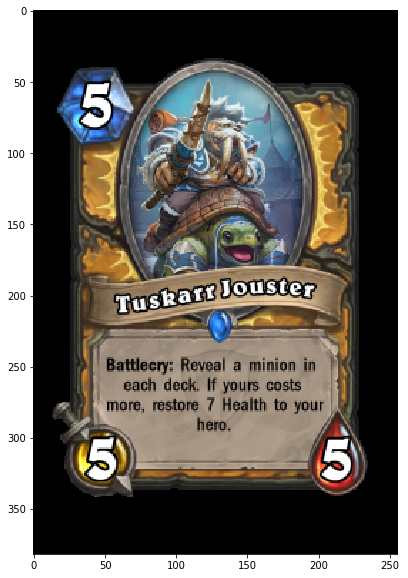

In [0]:
import pprint as pp
# a random image that we chose, to show the workflow

original_img = cv2.imread("train/Images/AT_104.png")

#LIMITATIONS (uncomment to see)
# original_img = cv2.imread("customCards/customCard.png")
# original_img = cv2.imread("customCards/customCard5.png")

original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(original_img)
results = tfnet2.return_predict(original_img)
pp.pprint(results)

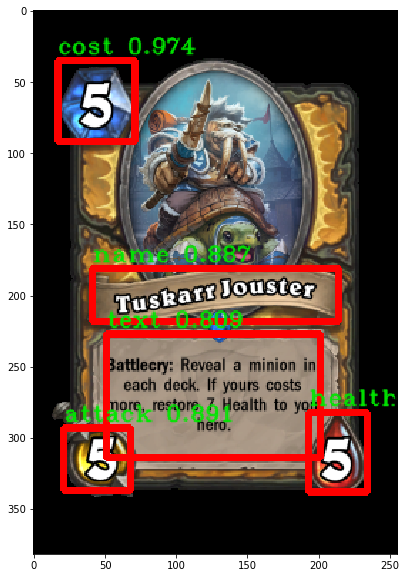

In [0]:
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(boxing_original(original_img,results))

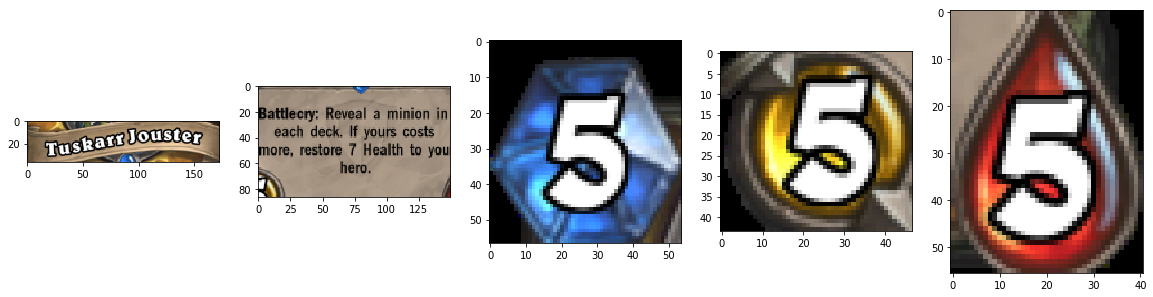

In [0]:
name,text,cost,attack,health = boxing(original_img, results)
fig, ax = plt.subplots(1,5,figsize=(20, 10))
ax[0].imshow(name)
ax[1].imshow(text)
ax[2].imshow(cost)
ax[3].imshow(attack)
ax[4].imshow(health)

# Loading the neural network for digit classification

Here, we load the pretrained model, which was trained on 103,520 images to recognize digits in our cards.

`model_structure.json` contains the structure data of the exported neural network.

`model_weights.h5` contains the weights of the exported neural network.

Once loaded, the model requires re-compilation.

Referred [here](https://www.kaggle.com/juanlebk/apply-cnn-for-digit-recognition-with-keras), [here](https://towardsdatascience.com/a-simple-2d-cnn-for-mnist-digit-recognition-a998dbc1e79a), [here](https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/) and [here](https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/)

In [0]:
from PIL import Image
from keras.models import model_from_json
import tensorflow as tf

json_file = open('model_structure.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights('model_weights.h5')
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [0]:
def predict_digit(image): # takes in image npArray
    img=Image.fromarray(image)
    img = img.convert('RGB')
    img=img.resize((50,50))
    img=np.array(img)
    img=img.reshape(1,50,50,3)
    return np.argmax(model.predict(img)[0]) 


In [0]:
predict_digit(health)

5

# Loading the text recognition stuff:
Using Google cloud vision API to get the text. 
The setup process included downloading the `apikey.json` file from the GCP console and adding it to PATH under the variable name `GOOGLE_APPLICATION_CREDENTIALS`. (adding it to `~/.bashrc` on linux based systems)

Also need to

`pip install google-cloud` 

`pip install google-cloud-vision`

and other dependancies required.

Referred to [this](https://www.youtube.com/watch?v=nMY0qDg16y4) video, and [this](https://cloud.google.com/vision/docs/detecting-text#vision-text-detection-python) and [this](https://cloud.google.com/vision/docs/detecting-text#vision-text-detection-python) link.

In [0]:
! pip install google-cloud 
! pip install google-cloud-vision
import io
from google.cloud import vision

## At this point , upload your `apikey.json` file for the text recognition to work

Referred [this](https://cloud.google.com/docs/authentication/production#auth-cloud-implicit-python) article, especially the *Passing the path to the service account key in code* part, to know how to pass the credentials from a file and not an environment variable.

In [0]:
!ls  ..

apikey.json  CZ1016-project  sample_data


In [0]:
import json
  
def detect_text(np_image): # image is a numpy array
    """Detects text in the image, returns it as a string"""    
    client = vision.ImageAnnotatorClient.from_service_account_file("../apikey.json") ## where it's getting apikey.json from. we are currently in out project directory.
    success, content = cv2.imencode('.png', np_image)
    content = content.tobytes()
    image = vision.types.Image(content=content)
    response = client.text_detection(image=image)
    try:
        text_response = response.text_annotations
        text_content = text_response[0].description 
        return text_content
    except:
        return ''

In [0]:
# name, text have textual content
print(detect_text(name))
print(detect_text(text))

Tuskarr Jouster

Battlecry: Reveal a minion in
each deck. If yours costs
more, restore 7 Health to you
hero.



# Let's see the output for a few randomly chosen cards!

In [0]:
import os, random
home_folder='train/Images/'
files=os.listdir(home_folder)

In [0]:
def printCard(fileName,original_img, results, name_text, text_text,cost_num, attack_num,health_num):
    print(f'-----------RESULTS FOR CARD {fileName}------------')
    print(f'Name: {name_text}\nText: {text_text}\nCost: {cost_num}\nAttack: {attack_num}\nHealth: {health_num}')
    fig, ax = plt.subplots(1,2,figsize=(15, 7))    
    ax[0].imshow(original_img)
    ax[1].imshow(boxing_original(original_img,results))

In [0]:
def randomCardInfo():
    # loading random image
    random_index=random.randint(0,len(files)-1)
    original_img = cv2.imread(home_folder+files[random_index])
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    #getting bounding boxes and components
    results = tfnet2.return_predict(original_img)
    name,text,cost,attack,health = boxing(original_img, results)
    #getting numeric data
    cost_num, attack_num,health_num = predict_digit(cost),predict_digit(attack),predict_digit(health)
    #getting textual data
    name_text, text_text = detect_text(name), detect_text(text)
    printCard(files[random_index],original_img, results, name_text, text_text,cost_num, attack_num,health_num)
    

-----------RESULTS FOR CARD OG_080.png------------
Name: Xaril, Poisoned Mi

Text: Battlecry and Deathrattle:
Add a random Toxin card to
your hand

Cost: 4
Attack: 3
Health: 2


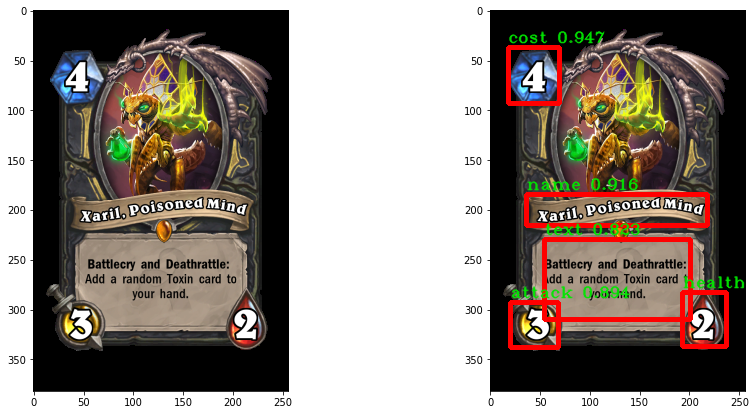

In [0]:
randomCardInfo()